# `ML Assignment`
## `Name: Chaitanya Sampat `  `Roll No: 121910319006`

### Q1. What is data Preprocessing. Why data preprocessing phase is required before model construction. Explain.

### `Data Pre-processing:` 
#### The process of converting or mapping data from its raw (initial) form into another format in order to prepare data for further analysis is called Data Pre-processing
#### Data preprocessing is also known as data cleaning or data wrangling.

The data preprocessing phase mainly focuses on following 5 aspects of the data:
- Identify and handle missing values.
- Data formatting.
- Data normalization.
- Data binning.
- Durning categorical values to numeric values.

### Dealing with missing values in python
- missing values occur when no data value is stored for a variable (feature) in an observation.
- it is represented as `?`, `NaN`, `0` or just a `blank cell`.

#### How to deal with missing values using python?

First of all we need to import the data using python module and we can  do that by importing python pandas module and also matlplotlib module.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now to read a CSV file containing data we can use `read_csv()` method 

In [2]:
# loading the dataset to a pandas dataframe
dataset = pd.read_csv("placement_Dataset.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


As we can see the data set contains 215 rows or observations and 15 columns or attributes.<br><br>
Also as we can observe that value at last column of fourth row is a NaN value which stands for Not a number which is basically a missing value.<br><br>
Now our task is to identify such discrepancies in our data set and replace or delete them.

Also to extract the missing values from out data set, we can use `.isnull()` method.

In [4]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

As we can see we have 67 such missing values in the salary column.
So to deal with such missing values we can do two things:<br>
1. replacing the missing values with some statistical values such as:
    1. replacing with mean.
    2. replacing with median.
    3. replacing with mode.
2. Dropping the values.

Dropping values is genrally not preffered, but if we are dealing with large data sets then we may opt for dropping the values strategy.<br>
Here since we are working with small data set we opt for replacing strategy or technique.

Now For replacing the missing values with mean median or mode, which one is more suitable to our data depends on how the data pattern varies. one strategy may work for some data set and may not work for another.<br><br>
So, to decide which strategy works best for our data set, we can use data visualisation techniques for better understanding and insights of our data set.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

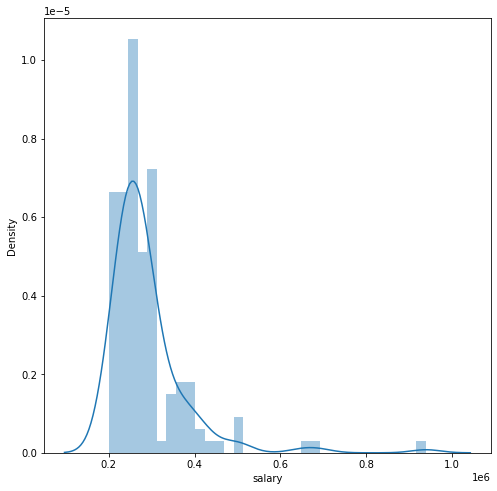

In [5]:
# analyze the distribution of data in salary column
fig, ax= plt.subplots(figsize=(8,8))
sns.distplot(dataset.salary)

as we can observe that our distribution plot values are concentrated only in one certain range between (0.2 - 0.5). and we also have some exception values at 0.7 and 0.9 range.<br><br>
In such cases, usage of mean as a replacement value for our missing values will not be a good choice. median or Mode are more prefferable in such situations.

To replace the missing values with mode or median we can use `.fillna()` method.

In [6]:
dataset['salary'].fillna(dataset['salary'].median(), inplace=True)

Now lets check whether our missing values are replaced with median value or not.

In [7]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

as we can see, all our salary column missing values are replaced with the median values.<br>
lets visualize our data again and see how the plot looks like after replacement.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

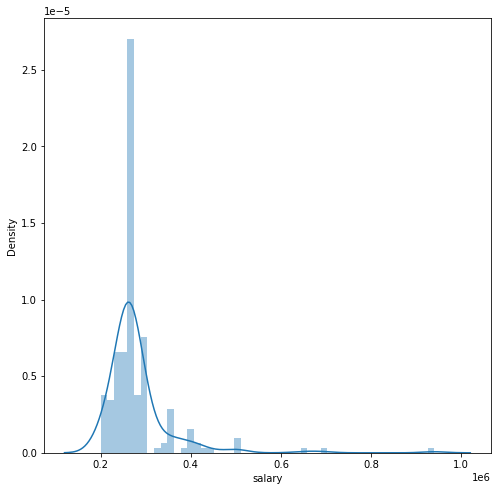

In [8]:
fig, ax= plt.subplots(figsize=(8,8))
sns.distplot(dataset.salary)

#### So this is how we can deal will missing values in our data set.

## Q2. What is data standardisation. Explain the need for data standardization. Explain with examples various methods available in Scikit learn package for data standardization.

# Data standardization

- Data standardization is the process of bringing data into a uniform format that allows analysts and others to research, analyze and utilize the data.<br><br>
- In statistics, standardization refers to the process of putting different variable on the same scale in order to compare scores between different types of variables.

## To Demostrate Data standardization using Scikit Learn module:

At first, we need to import the required python modules to perform data standardization as follows:

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

And we will also import the datasets module from scikit learn

In [10]:
import sklearn.datasets

In [11]:
#Loading the dataset
dataset = sklearn.datasets.load_breast_cancer()

In [12]:
#To display the data set
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

as we can see, the breast cancer data set has Data values in the `data` key and `features_name` key as the corresponding column names.<br>
The `Target` key indicates the stage of the breast cancer cells i.e; either a malignant or benign stage. `0` idicates benign stage and `1` indicates malignant stage.

To to analyze the above data we will load it into a python dataframe for furthur analysis.

In [13]:
#loading the data to the pandas dataframe
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [14]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


as we can see the data frame has `569 rows` or `observations` and `30 columns` or `attributes` of the data.

to display the first 5 rows of the iris data set we can use `head()` method

In [15]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


as we observe the data values:
- mean radius cloumn has values ranging from 10-20.
- 3rd column mean perimeter has values ranging more than 100.
- 4th column mean area has values ranging more than 1000.
- some clolumns also have ranging between 0-1.

so, we need to standardize the data to same scale for better comparision and analysis operations.

now before standarizing we need to store all the above dataframe data into a single variable and store the target variable into another variable.

In [16]:
X = df
Y = dataset.target

Here, the `X` is the features and `Y` is the target variable.

In [17]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [18]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

Now we need to split the data into `train set` and `test set` before applying the sklearn standarization techniques.<br>
so, for train test split we will use the `train_test_split()` method.

In [19]:
X_train, X_test, Y_train,  Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


so our data of 569 observations has been split into 455 observations of train set and 114 observations of test set.

Now, We standardize the data.

For checking whether we have standardized data or not we can apply standard deviation on to out data set using python in-built `std()` method.

In [21]:
print(dataset.data.std())

228.29740508276657


A standard deviation value around 1 indicates that our data is standardized. <br>But as we can see, upon checking the standard deviation of out data we got it around 228 which indicates our data is not in the same range and it varies a lot.

so, to standardize our data we use `StandardScalar` function from our imported `sklearn.preprocessing` module.

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(X_train)

StandardScaler()

now we will transform the data based on our standard scalar.

In [24]:
X_train_standardized = scaler.transform(X_train)

In [25]:
print(X_train_standardized)

[[ 1.40381088  1.79283426  1.37960065 ...  1.044121    0.52295995
   0.64990763]
 [ 1.16565505 -0.14461158  1.07121375 ...  0.5940779   0.44153782
  -0.85281516]
 [-0.0307278  -0.77271123 -0.09822185 ... -0.64047556 -0.31161687
  -0.69292805]
 ...
 [ 1.06478904  0.20084323  0.89267396 ...  0.01694621  3.06583565
  -1.29952679]
 [ 1.51308238  2.3170559   1.67987211 ...  1.14728703 -0.16599653
   0.82816016]
 [-0.73678981 -1.02636686 -0.74380549 ... -0.31826862 -0.40713129
  -0.38233653]]


Now, we can observe that the data is scaled around 0-2 range.

similarly, we will standardize X_test data also.

In [27]:
X_test_standardized = scaler.transform(X_test)

In [28]:
print(X_test)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
266        10.60         18.95           69.28      346.4          0.09688   
448        14.53         19.34           94.25      659.7          0.08388   
420        11.57         19.04           74.20      409.7          0.08546   
493        12.46         12.83           78.83      477.3          0.07372   
321        20.16         19.66          131.10     1274.0          0.08020   
..           ...           ...             ...        ...              ...   
169        14.97         16.95           96.22      685.9          0.09855   
551        11.13         22.44           71.49      378.4          0.09566   
566        16.60         28.08          108.30      858.1          0.08455   
287        12.89         13.12           81.89      515.9          0.06955   
404        12.34         14.95           78.29      469.1          0.08682   

     mean compactness  mean concavity  mean concave points  mea

In [29]:
print(X_train_standardized.std())

1.0


As, we can see our X_train_standardized standard deviation is 1 which indicates our data is  properly standardized.

#### So, this is how we standardize our data using `sklearn.preprocessing` module.